Notes from class: (what you should do)
One page poster
Monetary - average purchase
*same day purchases are one purchase
customers with at least 6 months, or their first purchase was at least 6 months ago. 
do a profile on people who do one purchase
at least have made x in purchases. 
go by date instead of by invoice number *
decide on number of clusters
bubble chart

after the cleaning go back and look for percentage of totoal purchases and customers

Need some marketing after the tech




In [30]:
import pandas as pd
import matplotlib as plt
import os
import numpy as np


In [31]:
#funciton to load the data
def import_retail_data():
    csv_file_path = 'Online Retail.csv'
    xlsx_file_path = 'Online Retail.xlsx'
    
    global df  # Declare df as a global variable
    
    if os.path.isfile(csv_file_path):
        df = pd.read_csv(csv_file_path)
    else:
        df = pd.read_excel(xlsx_file_path)
    
    return df
import_retail_data().head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [32]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Quantity and UnitPrice both had a min < 0.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


CustomerID, and Description both have null values

In [34]:
df.shape

(541909, 8)

In [35]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [36]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [37]:
# drop null values
df_null = df[df.isnull().any(axis=1)]
df = df[~df.isnull().any(axis=1)]

# convert the CustomerID to int
df['CustomerID'] = df['CustomerID'].astype(int)

# round to the nearest day
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'] = df['InvoiceDate'].dt.round('D')



C:\Users\nfs25\AppData\Local\Temp\ipykernel_28728\3010605793.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID'] = df['CustomerID'].astype(int)
C:\Users\nfs25\AppData\Local\Temp\ipykernel_28728\3010605793.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
C:\Users\nfs25\AppData\Local\Temp\ipykernel_28728\3010605793.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int32         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 26.4+ MB


In [39]:
# Check for duplicate rows in the dataframe
df.duplicated().sum()

5226

In [40]:
min_date = pd.to_datetime(df['InvoiceDate'].min())
max_date = pd.to_datetime(df['InvoiceDate'].max())
time_period = max_date - min_date

print("Time period of the data:")
print("Start date:", min_date)
print("End date:", max_date)
print("Time period:", time_period)

Time period of the data:
Start date: 2010-12-01 00:00:00
End date: 2011-12-10 00:00:00
Time period: 374 days 00:00:00


In [41]:
df['TotalPrice'] = df['UnitPrice'] * df['Quantity']

C:\Users\nfs25\AppData\Local\Temp\ipykernel_28728\1813793983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['UnitPrice'] * df['Quantity']


In [42]:
df.drop(['InvoiceNo','Country', 'Description', 'StockCode'], inplace=True, axis=1)

C:\Users\nfs25\AppData\Local\Temp\ipykernel_28728\1625915345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['InvoiceNo','Country', 'Description', 'StockCode'], inplace=True, axis=1)


In [43]:
df

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
0,6,2010-12-01,2.55,17850,15.30
1,6,2010-12-01,3.39,17850,20.34
2,8,2010-12-01,2.75,17850,22.00
3,6,2010-12-01,3.39,17850,20.34
4,6,2010-12-01,3.39,17850,20.34
...,...,...,...,...,...
541904,12,2011-12-10,0.85,12680,10.20
541905,6,2011-12-10,2.10,12680,12.60
541906,4,2011-12-10,4.15,12680,16.60
541907,4,2011-12-10,4.15,12680,16.60


In [56]:
# Calculate recency, frequency, and monetary metrics
recency = df.groupby('CustomerID')['InvoiceDate'].max().apply(lambda x: (df['InvoiceDate'].max() - x).days)
frequency = df.groupby('CustomerID')['InvoiceDate'].nunique()
monetary = df.groupby('CustomerID')['TotalPrice'].mean()
segmentation_df = pd.DataFrame({'Recency': recency, 'Frequency': frequency, 'Monetary': monetary})


In [57]:
segmentation_df

,Recency,Frequency,Monetary
CustomerID,,,
12346,326,1,0.000000
12347,2,7,23.681319
12348,75,4,57.975484
12349,19,1,24.076027
12350,310,1,19.670588
...,...,...,...
18280,278,1,18.060000
18281,181,1,11.545714
18282,8,3,13.584615


In [59]:
filtered_segmentation_df = segmentation_df[(segmentation_df['Recency'] < 365) & (segmentation_df['Frequency'] > 1) & (segmentation_df['Monetary'] > 0)]
filtered_segmentation_df

,Recency,Frequency,Monetary
CustomerID,,,
12347,2,7,23.681319
12348,75,4,57.975484
12352,36,7,16.267474
12356,23,3,47.651356
12358,2,2,61.476842
...,...,...,...
18276,21,2,20.210000
18277,58,2,10.847778
18282,8,3,13.584615


K-means

In [61]:
#prep
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = pd.DataFrame(scaler.fit_transform(filtered_segmentation_df), columns=filtered_segmentation_df.columns)
original_data = pd.DataFrame(scaler.inverse_transform(scaled_data))

In [65]:
from sklearn.cluster import KMeans

# Specify the number of clusters
num_clusters = 4 

# Create the K-means model
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the data
kmeans_model.fit(scaled_data)

# Get the cluster labels for each data point
cluster_labels = kmeans_model.labels_

# Add the cluster labels to the segmentation_df dataframe
scaled_data['Cluster'] = cluster_labels
filtered_segmentation_df['Cluster'] = cluster_labels

C:\Users\nfs25\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nfs25\AppData\Local\Temp\ipykernel_28728\2182350560.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_segmentation_df['Cluster'] = cluster_labels


In [66]:
filtered_segmentation_df

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12347,2,7,23.681319,0
12348,75,4,57.975484,1
12352,36,7,16.267474,0
12356,23,3,47.651356,0
12358,2,2,61.476842,0
...,...,...,...,...
18276,21,2,20.210000,0
18277,58,2,10.847778,1
18282,8,3,13.584615,0


In [68]:
import plotly.express as px

fig = px.scatter_3d(filtered_segmentation_df, x='Recency', y='Frequency', z='Monetary', color='Cluster')
fig.show()


K-means with limited Frequency

In [91]:
segmentation_df.drop(columns=['Cluster'], inplace=True)

In [92]:
limit_freq_segmentation_df = segmentation_df[segmentation_df['Frequency'] < 50]


In [93]:
scaled_data = pd.DataFrame(scaler.fit_transform(limit_freq_segmentation_df), columns=limit_freq_segmentation_df.columns)
original_data = pd.DataFrame(scaler.inverse_transform(scaled_data))

In [94]:
from sklearn.cluster import KMeans

# Specify the number of clusters
num_clusters = 8

# Create the K-means model
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the data
kmeans_model.fit(scaled_data)

# Get the cluster labels for each data point
cluster_labels = kmeans_model.labels_

limit_freq_segmentation_df['Cluster'] = cluster_labels

C:\Users\nfs25\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nfs25\AppData\Local\Temp\ipykernel_10948\2402709719.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  limit_freq_segmentation_df['Cluster'] = cluster_labels


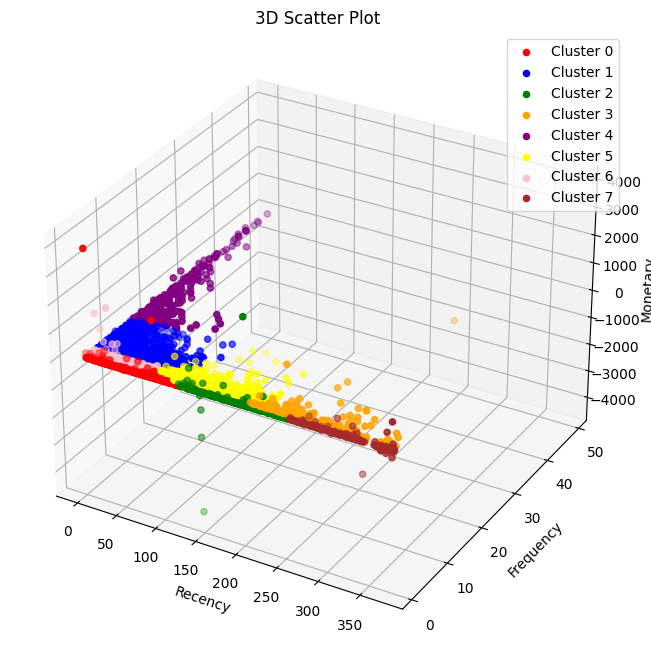

In [95]:
import matplotlib.pyplot as plt
# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Set the colors for each cluster
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'pink', 'brown']

# Plot each data point with the corresponding cluster color
for cluster in range(num_clusters):
    cluster_data = limit_freq_segmentation_df[limit_freq_segmentation_df['Cluster'] == cluster]
    ax.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], cluster_data.iloc[:, 2], c=colors[cluster], label=f'Cluster {cluster}')

# Set the labels for each axis
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# Set the title and legend
ax.set_title('3D Scatter Plot')
ax.legend()

# Show the plot
plt.show()


NearestNeighbors

In [96]:
from sklearn.neighbors import NearestNeighbors

scaled_data = pd.DataFrame(scaler.fit_transform(segmentation_df), columns=segmentation_df.columns)
original_data = pd.DataFrame(scaler.inverse_transform(scaled_data))

k = 4  # For example, k = 4
nbrs = NearestNeighbors(n_neighbors=k).fit(scaled_data)
distances, indices = nbrs.kneighbors(scaled_data)

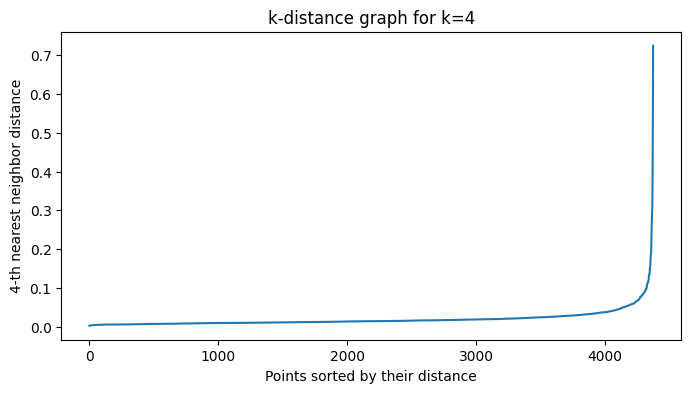

In [97]:
import matplotlib.pyplot as plt

sorted_distances = np.sort(distances[:, k-1], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(sorted_distances)
plt.xlabel("Points sorted by their distance")
plt.ylabel(f"{k}-th nearest neighbor distance")
plt.title(f"k-distance graph for k={k}")
plt.show()

DBSCAN

In [98]:
from sklearn.cluster import DBSCAN
min_samples = 4

# Create an instance of the DBSCAN class with your chosen parameters
dbscan = DBSCAN(eps=0.1, min_samples=min_samples)

# Fit the model to your data and also return the cluster labels
clusters = dbscan.fit_predict(scaled_data)

In [99]:
clusters

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

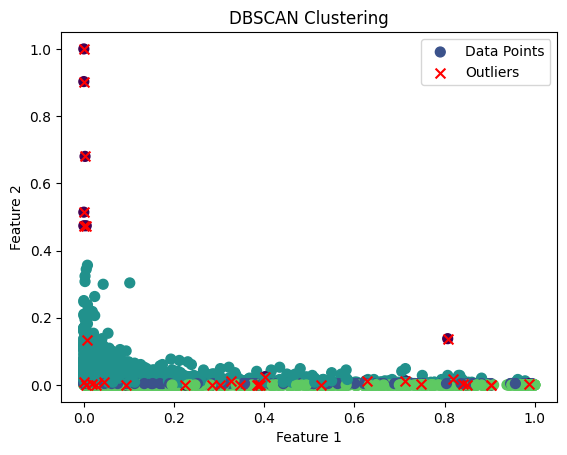

In [100]:
# Convert the DataFrame to a numpy array
scaled_data = scaled_data.to_numpy()

# Plot the points with a color for each cluster
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis', marker='o', s=50, label='Data Points')

# Mark the outliers
plt.scatter(scaled_data[clusters == -1, 0], scaled_data[clusters == -1, 1], c='red', marker='x', s=50, label='Outliers')

# Add some enhancements
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()